### This files for preprocessing the original ibean data
including:
Load, resize, shuffle, store the image arrays in numpy files to use in machine learning

# Imports

In [708]:
import numpy as np
import pandas as pd
from PIL import Image
import os, sys, random
from glob import glob
import matplotlib.pyplot as plt
import cv2 as cv

import imageio

%matplotlib inline

#### Set random seeds

In [710]:
# Set random seeds - for repducibility
#
random.seed(777)
np.random.seed(777)

# Constants

In [712]:
PATH_1 = 'data/0_angular_leaf_spot'
PATH_2 = 'data/1_bean_rust'
PATH_3 = 'data/2_healthy'
CLASSES = 3
FILE = '/*.jpg'
LABELS=['Angular Leaf Spot', 'Bean Rust','Healthy']

WIDTH = 300
HEIGHT = 300  
CHANNELS = 3
NR_IMAGE = 1295
SHAPE = (WIDTH, HEIGHT, CHANNELS)
TOTAL_INPUTS = WIDTH * HEIGHT * CHANNELS

TRAIN = 905
VAL = 1100

# Saved  file names
X_TRAIN = 'x_train_original.npy'  #905
X_VAL = 'x_val.npy'  # 195
X_TEST = 'x_test.npy'  #195
Y_TRAIN = 'y_train_original.npy'  #905
Y_VAL = 'y_val.npy'  #195
Y_TEST = 'y_test.npy'  #195


# Core Functions
Functions used to read data, check stats of data and save to numpy files

In [714]:
def show_image(data):
    if data is not None:
        plt.imshow(data)
        plt.axis('off')
    else:
        print('No image to show')

def describe_data(data):

    """
    This function describes the image data information
    descriptive stats and data shape. It also generate 
    the histogram of the image data
    """
    #descriptive stats
    print(f'mean average: {np.mean(data)}')
    print(f'min: {np.min(X)}, max = {np.max(data)}')
    print(f'median: {np.median(data)}')
    print(f'standard diviation: {np.std(data)}')
    print(f'Data shape: {len(data)}')
    # generate histogram
    if type(data) == list:
        plt.hist(data)
    else:
        data = list(data)
        plt.hist(data)


def check_class_distribution_prep(target):
    """
    This function checks target distributions and 
    generate a histogram.
    """
    
    # Histogram
    plt.title('Target value distribution')
    plt.hist(target, bins=5)
    plt.xticks([0, 1, 2])
    plt.xlabel('Classes', fontsize=15)
    plt.ylabel('Samples', fontsize=15)
    plt.show();
    

def transfer_image_to_array_by_class(path, value):
    """
    Returns each class of images in the 2-dim nparray 
    by reading image, in NumPy array, and 
    flattens, combines with labels 
    """
    im_path = path + FILE
    image_list = []
    files = glob(im_path)
    for file in files:
        with Image.open(file) as image:
            d = np.asarray(image)
            #Better quality
            d = cv.resize(d, dsize=(WIDTH,HEIGHT),
                             interpolation=cv.INTER_CUBIC)
      
            # flatten the 3-D to 1D
            d = d.flatten()
            # each pixel to array
            image_list.append(d)
    print(f'number of images= {len(image_list)}')
    labels = [value for i in range(len(image_list))]
    print(f'Number of labels= {len(labels)}')
    labels= np.reshape(labels, (len(labels), -1))
    # Return the combined array
    return np.concatenate((image_list, labels), axis=1)


def generate_all_image_data():
    """
    Returns the combined and shuffled data containing all classes
    """
    data_1 = transfer_image_to_array_by_class(path=PATH_1, value=0)
    data_2 = transfer_image_to_array_by_class(path=PATH_2, value=1)
    data_3 = transfer_image_to_array_by_class(path=PATH_3, value=2)

    #combine 3 classes
    data = np.concatenate((data_1, data_2, data_3), axis=0)
    
    # Random shuffle the concatenated list
    data = np.random.permutation(data)
    return data


def split_store_data(feature, target):
    """
    This function splits the data into into train (70%) validataion (15%) test (15%)
    Stores them in the files seperately
    """
    # spllit data  
    x_train = feature[:TRAIN]
    x_val = feature[TRAIN:VAL]
    x_test = feature[VAL:]
    y_train = target[:TRAIN]
    y_val = target[TRAIN:VAL]
    y_test = target[VAL:]
    
    print(f'train size = {len(x_train)}, {len(y_train)}')
    print(f'validataion size = {len(x_val)}, {len(y_val)}')
    print(f'test size = {len(x_test)}, {len(y_test)}')
    np.save(X_TRAIN, x_train)
    np.save(X_VAL, x_val )
    np.save(X_TEST, x_test)
    np.save(Y_TRAIN, y_train)
    np.save(Y_VAL, y_val)
    np.save(Y_TEST, y_test)
    print('All data is successfully stored.')

def verify_stored_data(r, x, y):
    """
    This function load the stored image file,
    reshape into 3-d array and
    returns the features and target seperately
    """
    # Load NPY files
    image = np.load(x)
    label = np.load(y)
    show_image(np.reshape(image[r], SHAPE))
    print(LABELS[label[r]])
    print(f'Image data info : {image.shape}')
    return (image, label)

# Read data and store 
Read all image data, resize andsave them as NumPy array

In [716]:
%%time
# The full list should be 1295 x 270000  
data = generate_all_image_data() # shuffled data before storing into files
X = [data[i][:TOTAL_INPUTS] for i in range(len(data))]
print(f'X length: {len(X)}, X[0] length :{len(X[0])}')
Y = [data[i][TOTAL_INPUTS] for i in range(len(data))]
print(f'Y length: {len(Y)}') 


number of images= 432
Number of labels= 432
number of images= 436
Number of labels= 436
number of images= 427
Number of labels= 427
X length: 1295, X[0] length :270000
Y length: 1295
CPU times: total: 3.58 s
Wall time: 8.02 s


Bean Rust


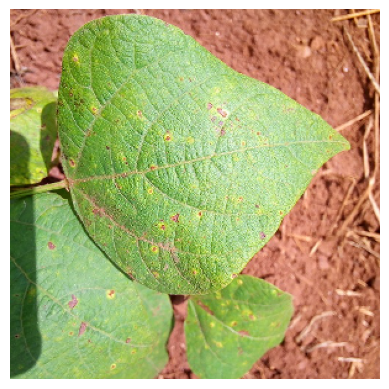

In [776]:
# Check an image and its label, stored in array
num = 1103
# number 0 ~ 1295 
show_image(np.reshape(X[num], SHAPE))
print(LABELS[Y[num]])

mean average: 111.7240935964536
min: 0, max = 255
median: 111.0
standard diviation: 58.46816001171903
Data shape: 1295
CPU times: total: 26.2 s
Wall time: 27.4 s


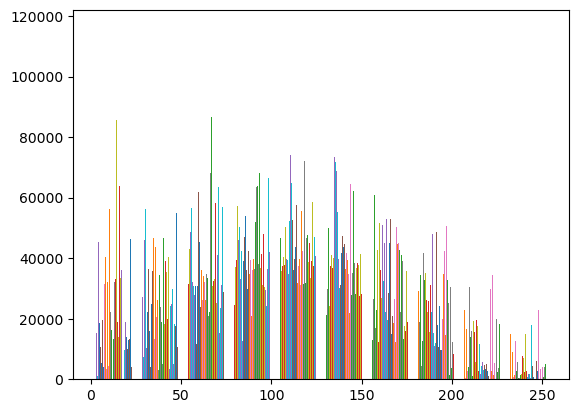

In [718]:
%%time
describe_data(X)

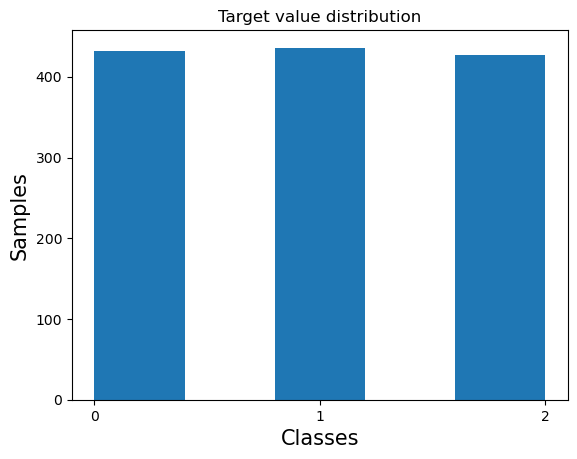

In [719]:
check_class_distribution_prep(target=Y)

# Store image data to files

In [721]:
%%time
# Split ad store data into numpy files
split_store_data(feature=X, target=Y)


train size = 905, 905
validataion size = 195, 195
test size = 195, 195
All data is successfully stored.
CPU times: total: 750 ms
Wall time: 2.7 s


## Verify stored data

Bean Rust
Image data info : (195, 270000)
The image is in the test set
CPU times: total: 93.8 ms
Wall time: 100 ms


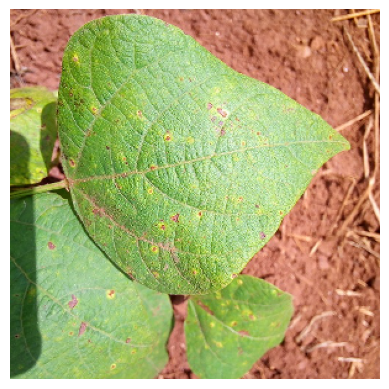

In [778]:
%%time
if num <= 905:
    A, B =  verify_stored_data(r=num, x=X_TRAIN, y=Y_TRAIN)
    print('The image is in the train set')
elif num > 905 and num < 1100:
    A, B =  verify_stored_data(r=num-905, x=X_VAL, y=Y_VAL)
    print('The image is in the validation set')
elif num >= 1100 and num <=1295:
    A, B = verify_stored_data(r=num-1100, x=X_TEST, y=Y_TEST)
    print('The image is in the test set')
else:
    print('No such image')

mean average: 111.44545403608737
min: 0, max = 255
median: 111.0
standard diviation: 58.695674294305405
Data shape: 195


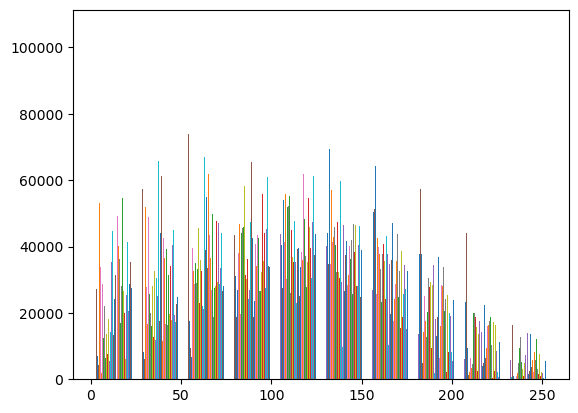

In [724]:
describe_data(A)

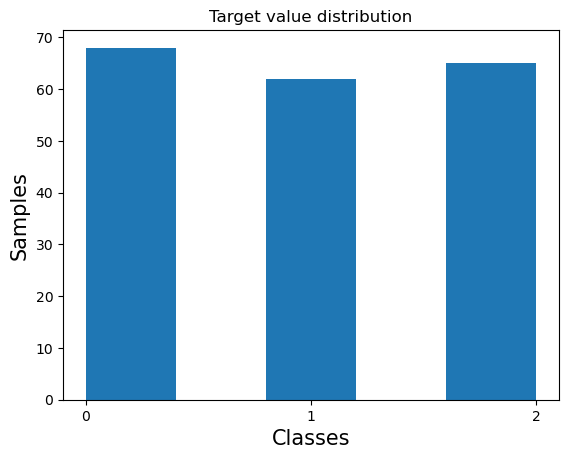

In [738]:
check_class_distribution_prep(target=B)

Licence for programs:
All programs and data written for this project use the Apache license, 
the details can be found here:
http://www.apache.org/licenses/


Raw image data: 
The ibean data  with the following details and uses the MIT Licence.
@ONLINE {beansdata,
    author="Makerere AI Lab",
    title="Bean disease dataset",
    month="January",
    year="2020",
    url="https://github.com/AI-Lab-Makerere/ibean/"
}
